   Train_No    Station  Scheduled_Hour        Day Weather  Passenger_Count  \
0     10103        CST               6    Tuesday   Clear             1135   
1     10180    Byculla              21  Wednesday   Clear             1625   
2     10093        CST              18  Wednesday   Clear              382   
3     10015  Ghatkopar              17     Sunday   Clear             1888   
4     10107     Kalyan              13   Saturday    Rain              687   

   Delay_Minutes  Delayed  
0              2        0  
1              4        0  
2             22        1  
3              2        0  
4             12        1  

----- KMeans Clustering -----
KMeans_Cluster
2    247
1    192
0     61
Name: count, dtype: int64


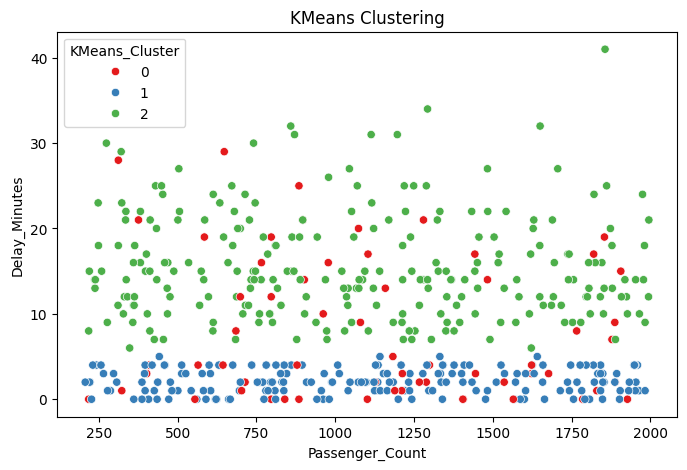


----- DBSCAN Clustering -----
DBSCAN_Cluster
-1    443
 0      8
 6      6
 2      6
 8      6
 9      6
 3      5
 1      5
 7      5
 4      5
 5      5
Name: count, dtype: int64


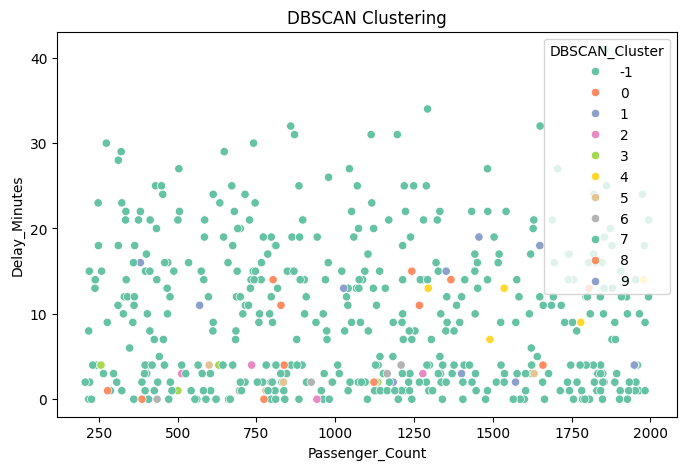


CLUSTERING ANALYSIS COMPLETE


In [1]:
# 🚆 Railway Delay Clustering Analysis

# Step 1: Import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler


# Step 2: Load dataset

data = pd.read_csv(r"C:\Users\Nida\Downloads\railway_delay_dataset.csv")

print(data.head())


# Step 3: Convert categorical to numeric

data_encoded = pd.get_dummies(data, drop_first=True)


# Step 4: Select features for clustering

X = data_encoded.drop(["Train_No"], axis=1)


# Step 5: Scale data

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)


# ------------------------------------------------

# 🤖 KMeans Clustering

print("\n----- KMeans Clustering -----")

kmeans = KMeans(n_clusters=3, random_state=42)

kmeans_labels = kmeans.fit_predict(X_scaled)

data["KMeans_Cluster"] = kmeans_labels

print(data["KMeans_Cluster"].value_counts())


# Visualization

plt.figure(figsize=(8,5))

sns.scatterplot(

    x=data["Passenger_Count"],

    y=data["Delay_Minutes"],

    hue=data["KMeans_Cluster"],

    palette="Set1"

)

plt.title("KMeans Clustering")

plt.show()


# ------------------------------------------------

# 🤖 DBSCAN Clustering

print("\n----- DBSCAN Clustering -----")

dbscan = DBSCAN(eps=1.5, min_samples=5)

dbscan_labels = dbscan.fit_predict(X_scaled)

data["DBSCAN_Cluster"] = dbscan_labels

print(data["DBSCAN_Cluster"].value_counts())


# Visualization

plt.figure(figsize=(8,5))

sns.scatterplot(

    x=data["Passenger_Count"],

    y=data["Delay_Minutes"],

    hue=data["DBSCAN_Cluster"],

    palette="Set2"

)

plt.title("DBSCAN Clustering")

plt.show()


# ------------------------------------------------

print("\nCLUSTERING ANALYSIS COMPLETE")


KMeans identified three groups of trains: low delay, medium delay, and high delay trains.

DBSCAN helps identify noise and unusual delay patterns.